In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mast.mast_client import ListType
import pyuda
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sys, os

lp_module_path = '/home/cl6305/Documents/data_access/mastu_exhaust_analysis/mastu_exhaust_analysis'
if lp_module_path not in sys.path:
    sys.path.append(lp_module_path)

from mastu_exhaust_analysis.pyLangmuirProbe import LangmuirProbe, compare_shots, probe_array

notebook_functions_path = '/home/cl6305/Documents/data_access/notebooks/plasma_control/diagnostic_analysis/'
if notebook_functions_path not in sys.path:
    sys.path.append(notebook_functions_path)

from custom_diagnostic_functions import *
import pyuda
client=pyuda.Client()
import matplotlib.pyplot as plt
import numpy as np


"""Plotting settings"""
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15


plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams.update({'font.size': 14})

shot_number = 49259
# shot_number = 49220
shot_number = 49213
# shot_number = 49259
# shot_number = 49260
# shot_number = 49212

shot_number = 45470


shot_number =  45416


# Magnetic axis tests

[   -61.36588 -43232.26       475.58557 ...  -4234.2456   -4264.9287
  -4234.2456 ]
2499973


(-0.1, 0.1)

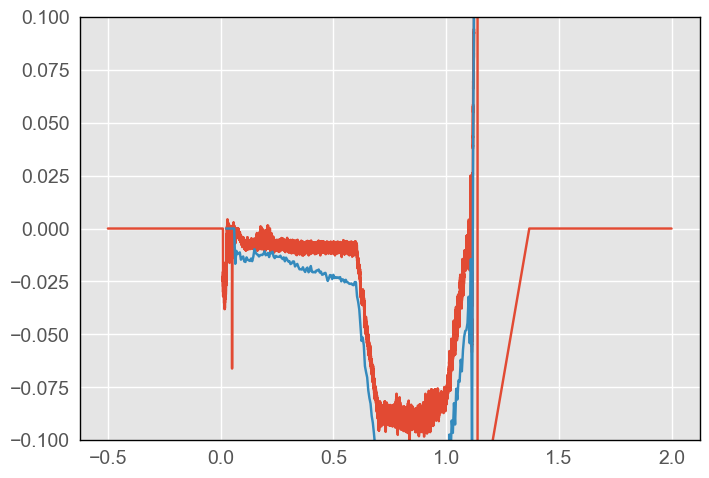

In [2]:


mag_z, mag_time = magnetic_axis_zc(shot_number, output_time=True, trim = True)

mag_efit, mag_time_efit = magnetic_axis_efit(shot_number, output_time=True)

plt.plot(mag_time, mag_z, label='Magnetic axis')
plt.plot(mag_time_efit, mag_efit, label='EFIT magnetic axis')
# plt.xlim(0,1)
plt.ylim(-0.10,0.10)


# D-alpha tests

## 450 kA Ohmic

Unforunately I can't find any usn/lsn 450 kA Ohmic shots.

### CD reference shot = 46562



[ -92.04882  -76.70735  -30.68294 ... 2071.0984  2071.0984  2055.7568 ]
2499969


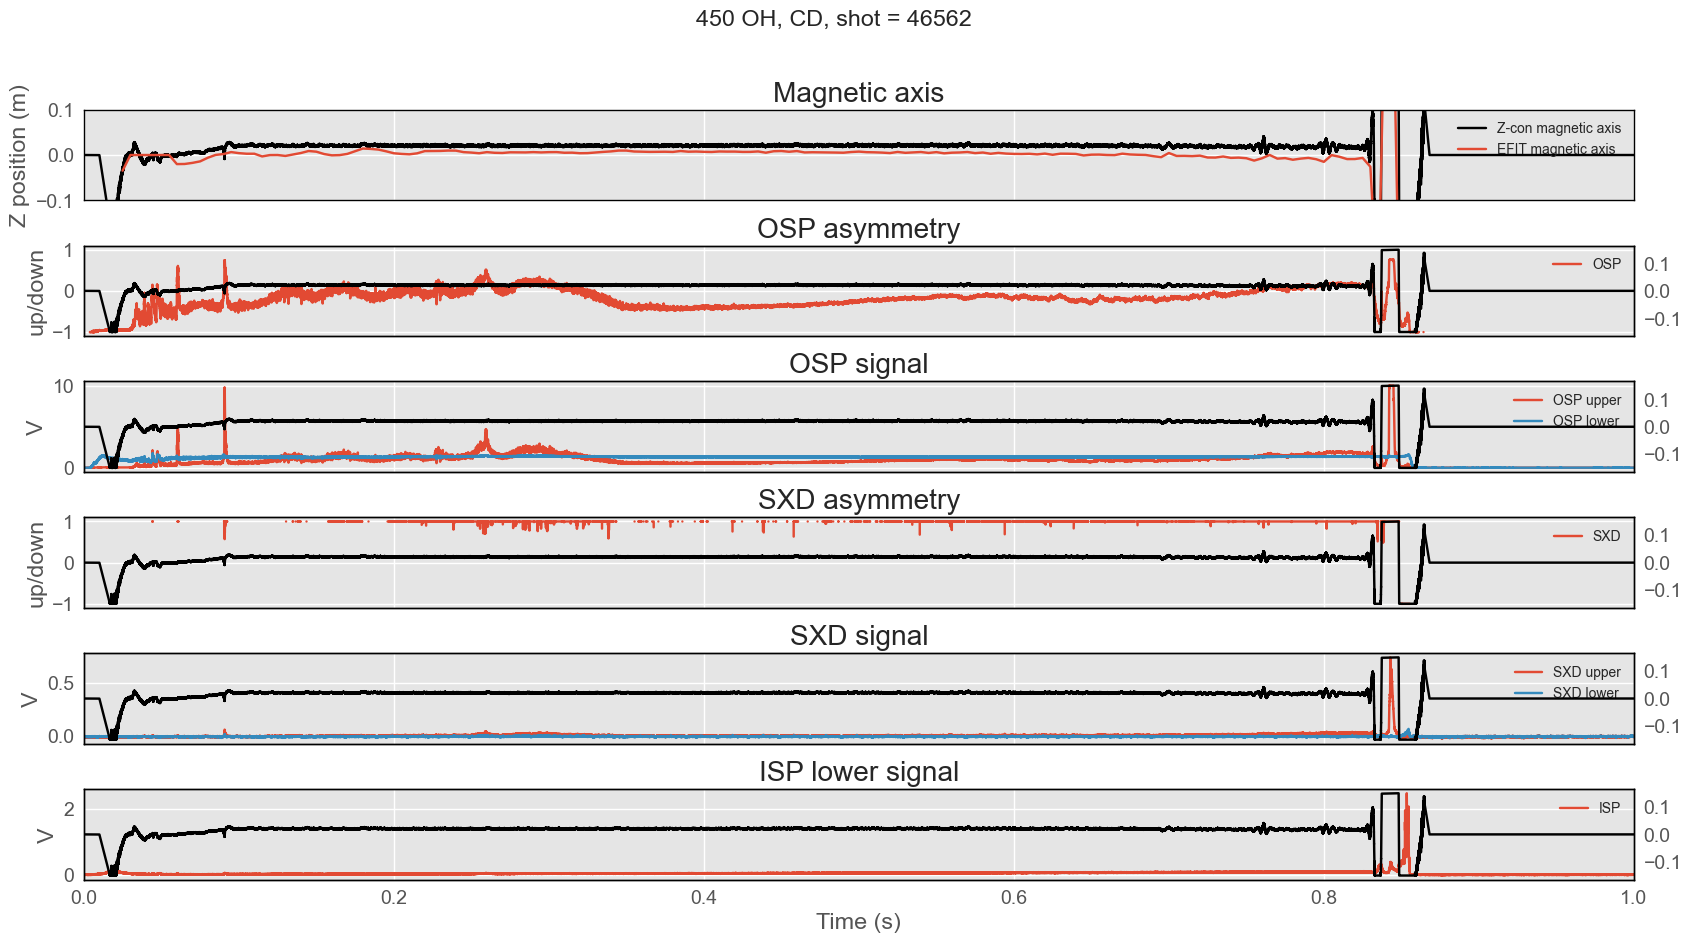

In [3]:
shot_number = 46562

compare_d_alpha(shot_number, '450 OH, CD, shot = 46562')


### SXD reference shot = 45416

[   -61.36588 -43232.26       475.58557 ...  -4234.2456   -4264.9287
  -4234.2456 ]
2499973


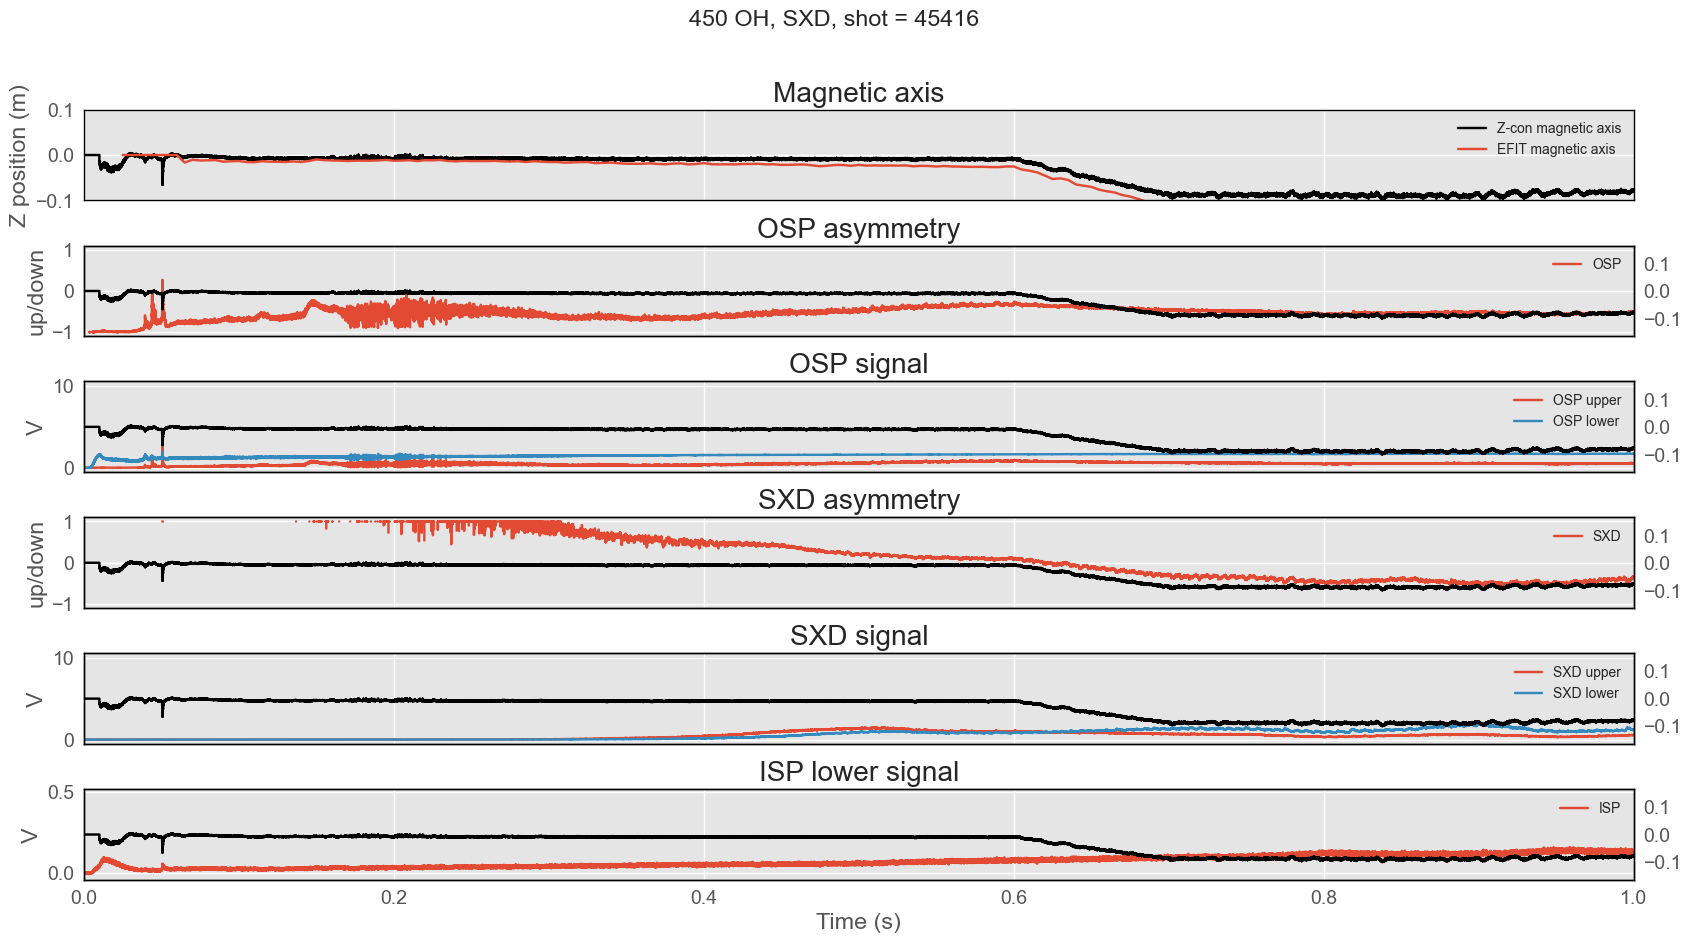

In [4]:
shot_number = 45416
compare_d_alpha(shot_number, '450 OH, SXD, shot = 45416')

## 750 kA Ohmic

### CD reference shot 48144

[  -122.73176   -153.4147   -1672.2202  ... -12441.932   -12411.249
 -12503.298  ]
1999975


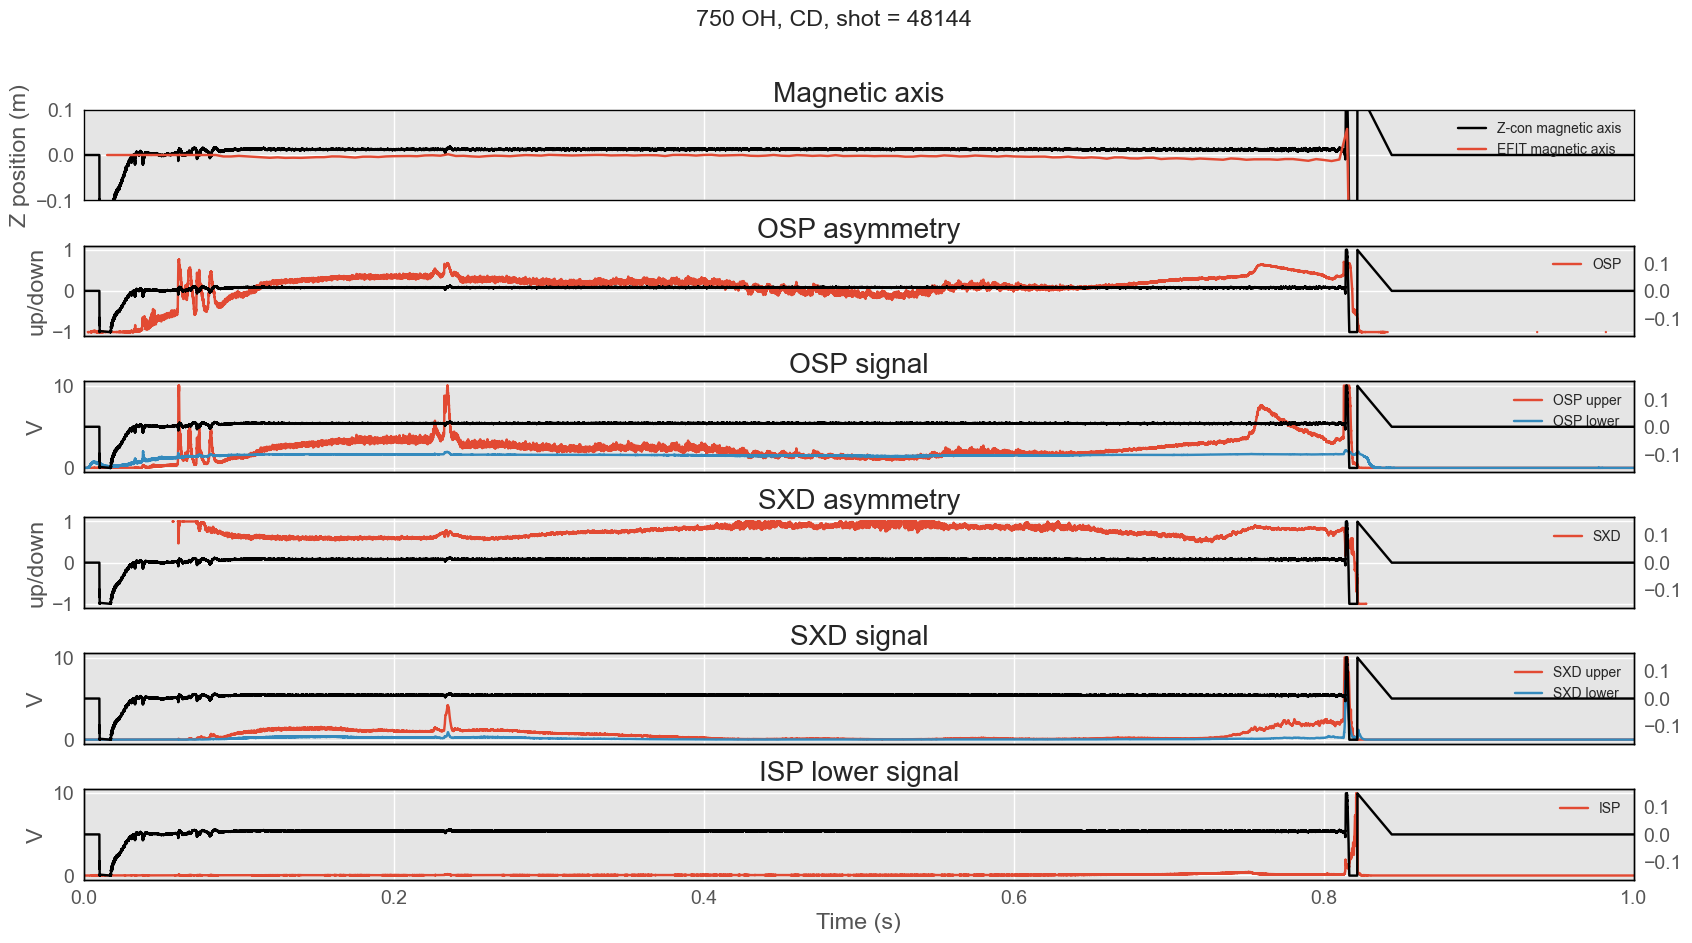

In [17]:
shot_number = 48144
compare_d_alpha(shot_number, '750 OH, CD, shot = 48144')

### SXD reference shot 45460

[-1.84097641e+02 -1.00544925e+06  9.97195557e+02 ... -4.37231885e+03
 -4.29561133e+03 -4.38766016e+03]
2499974


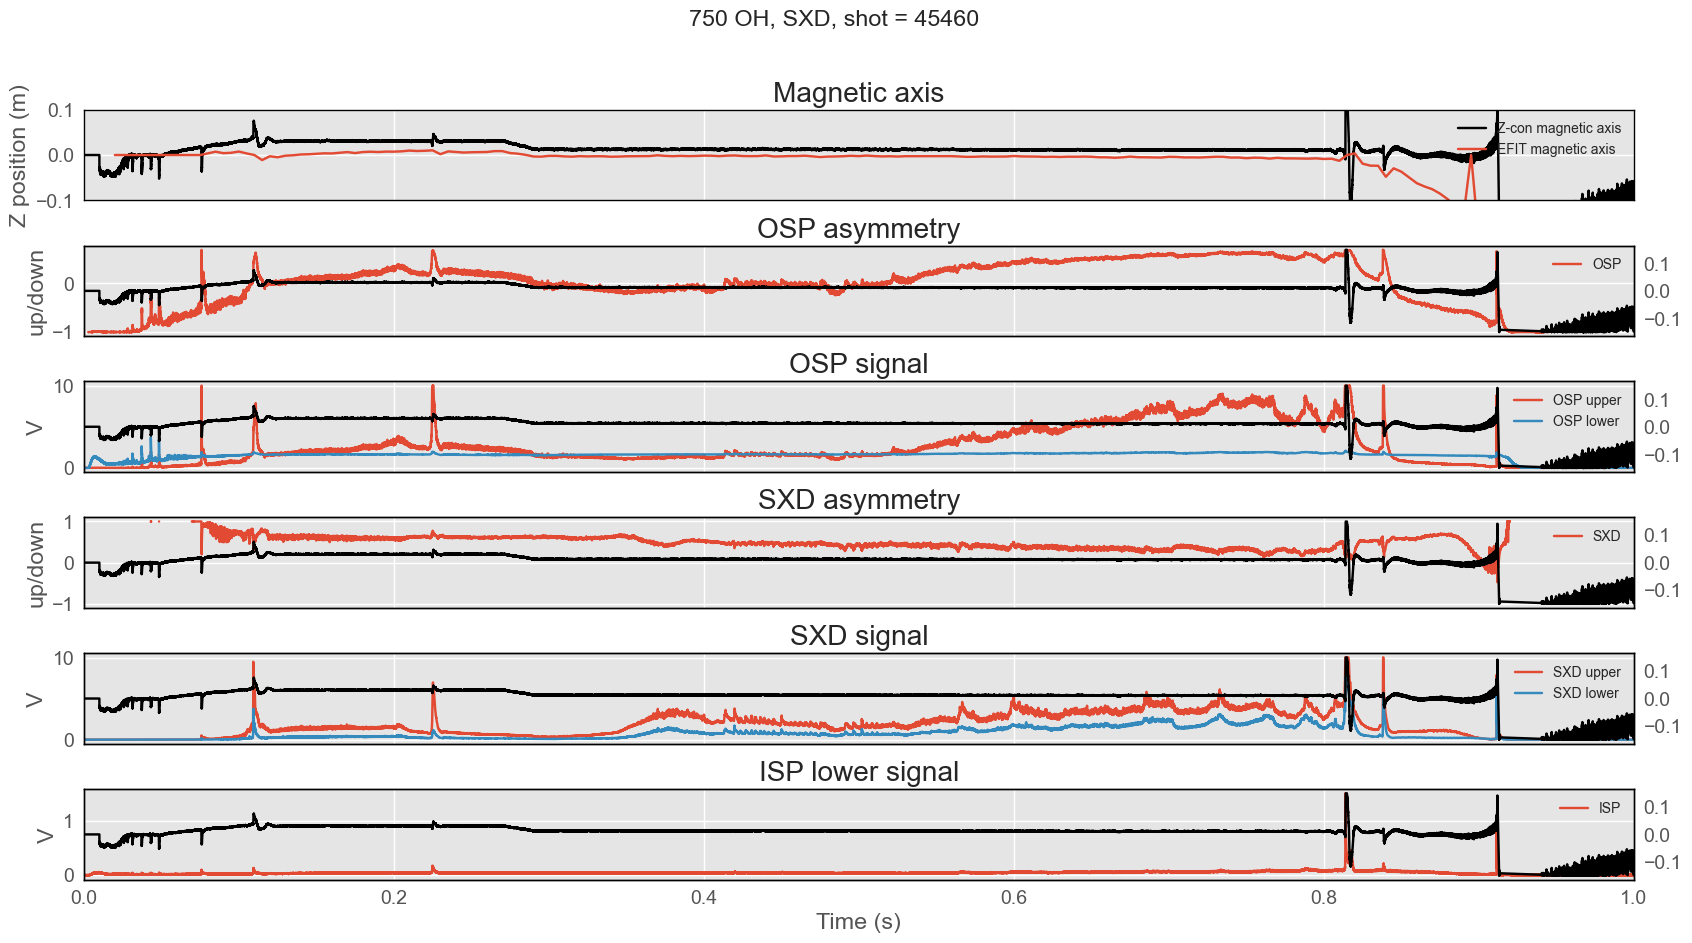

In [14]:
shot_number = 45460
compare_d_alpha(shot_number, '750 OH, SXD, shot = 45460')

## 750 kA 2 beams

### CD reference shot 48847 (only one beam, doesn't go into H mode)

[  -92.04882   230.12204   276.14645 ... -8990.102   -9005.442
 -8959.418  ]
2499969


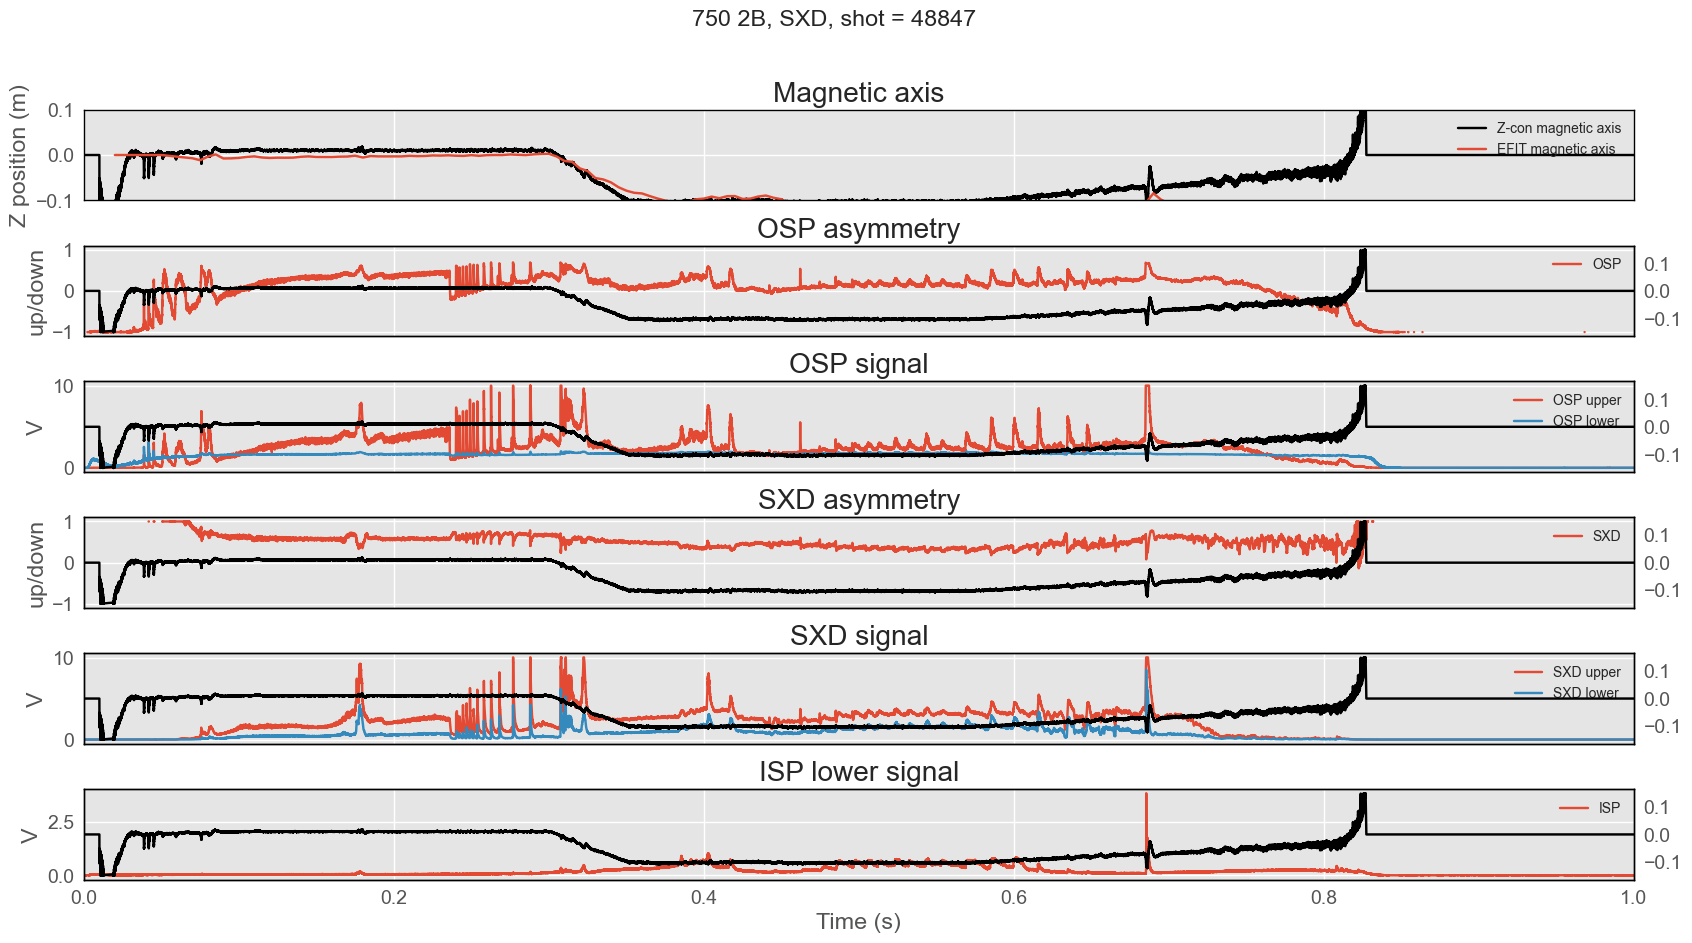

In [18]:
shot_number =  48847 
compare_d_alpha(shot_number, '750 1B, SXD, shot = 48847')

### SXD reference shot 49259

[-153.4147   -92.04882 -383.53674 ...  751.732    736.39056  813.0979 ]
2499968


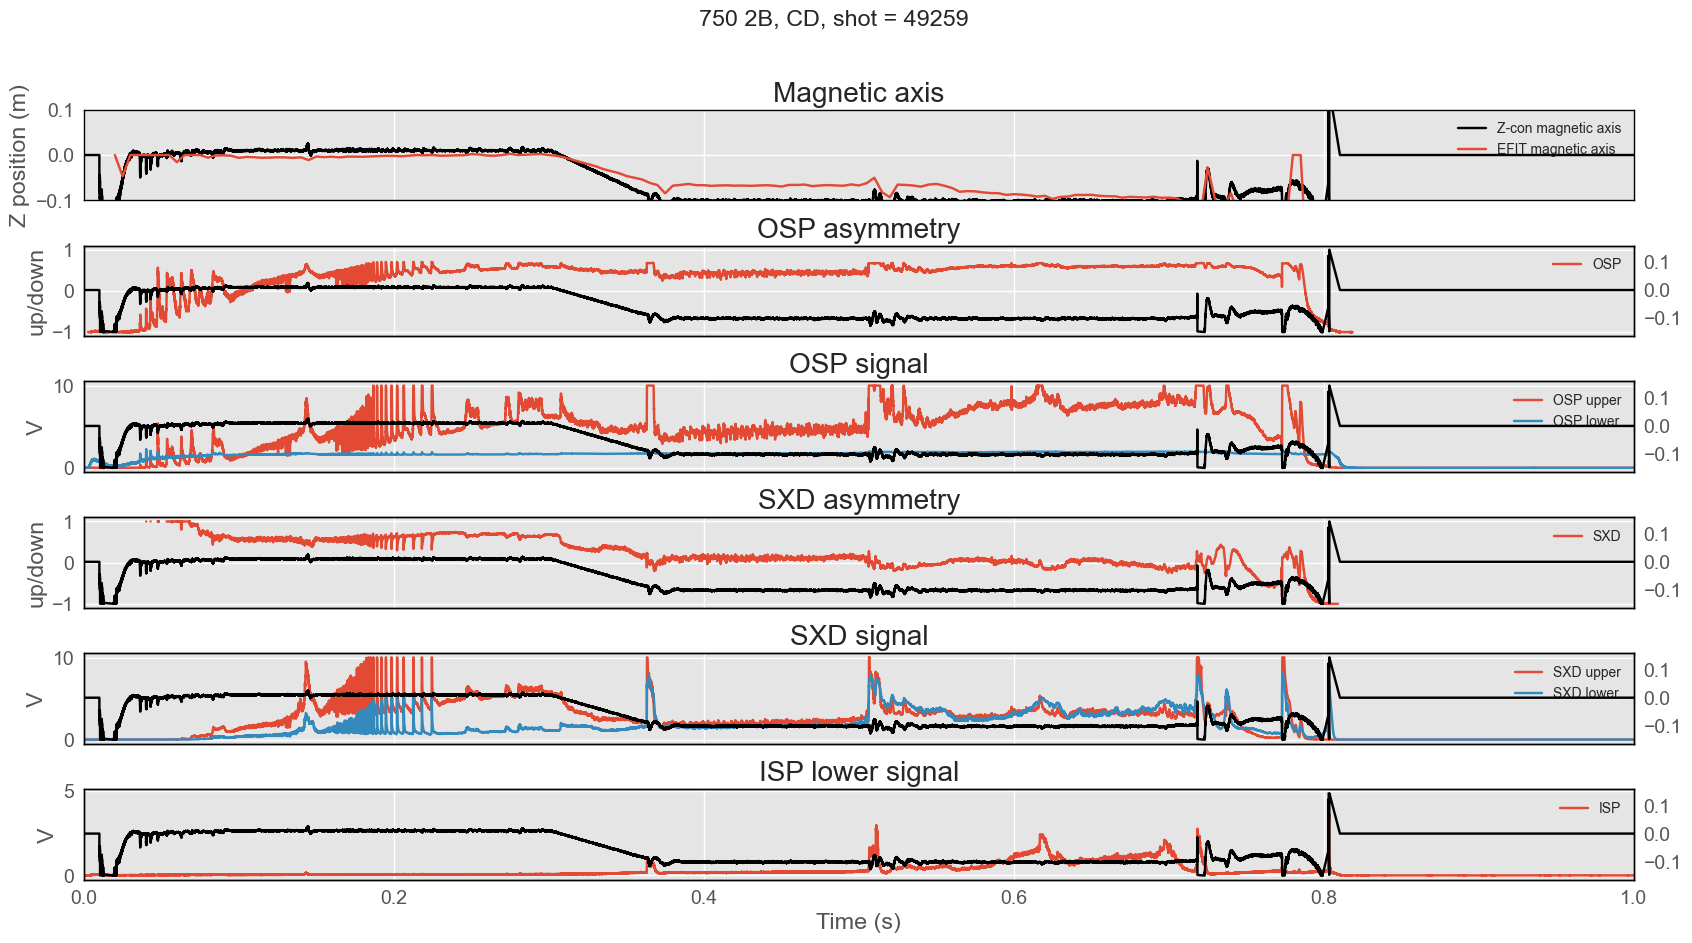

In [19]:
shot_number = 49259
compare_d_alpha(shot_number, '750 2B, CD, shot = 49259')

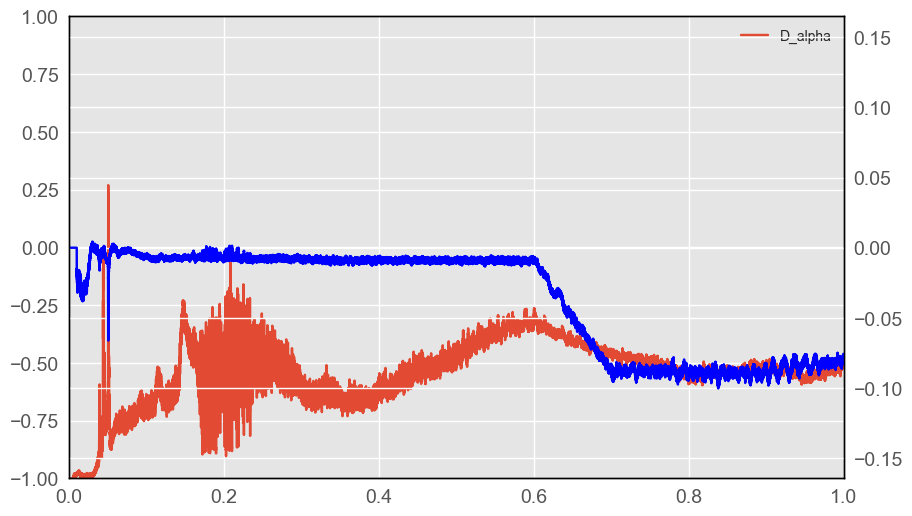

In [5]:


d_alpha, d_alpha_time = d_alpha_divertor_asymmetry(shot_number,'OSP', output_time=True)

d_alpha = d_alpha

fig,ax = plt.subplots(1,1 , figsize=(10,6))
ax.plot(d_alpha_time, d_alpha, label='D_alpha')
ax2 = ax.twinx()
ax2.plot(mag_time, mag_z, label='Magnetic axis', color = 'blue')

ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.legend()

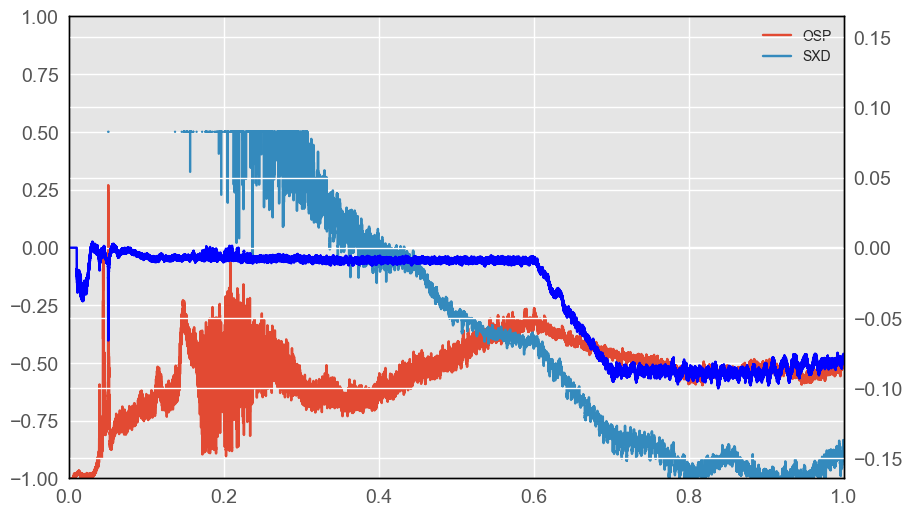

In [6]:

d_alpha_osp, d_alpha_osp_time = d_alpha_divertor_asymmetry(shot_number,'OSP', output_time=True)
d_alpha_sxd, d_alpha_sxd_time = d_alpha_divertor_asymmetry(shot_number,'SXD', output_time=True, offset = True)
d_alpha_isp, d_alpha_isp_time = d_alpha_divertor_asymmetry(shot_number,'ISP', output_time=True)


d_alpha_sxd = d_alpha_sxd 

fig,ax = plt.subplots(1,1 , figsize=(10,6))
ax.plot(d_alpha_osp_time, d_alpha_osp, label='OSP')
ax.plot(d_alpha_sxd_time, d_alpha_sxd, label='SXD')
# ax.plot(d_alpha_isp_time, d_alpha_isp, label='ISP')
ax2 = ax.twinx()
ax2.plot(mag_time, mag_z, label='Magnetic axis', color = 'blue')

ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.legend(loc = 'upper right')

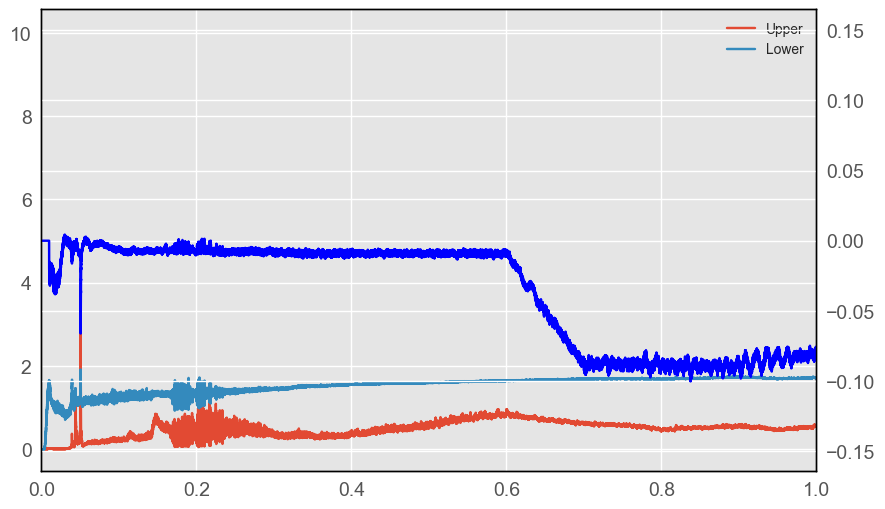

In [7]:
d_upper,d_lower, d_upper_time = d_alpha_signal(shot_number, 'OSP', output_time=True, normalisation= False)


fig,ax = plt.subplots(1,1 , figsize=(10,6))
ax.plot(d_upper_time, d_upper, label='Upper')
ax.plot(d_upper_time, d_lower, label='Lower')
ax2 = ax.twinx()
ax2.plot(mag_time, mag_z, label='Magnetic axis', color = 'blue')

ax.set_xlim(0,1)
# ax.set_ylim(-1,1)
ax.legend(loc = 'upper right')

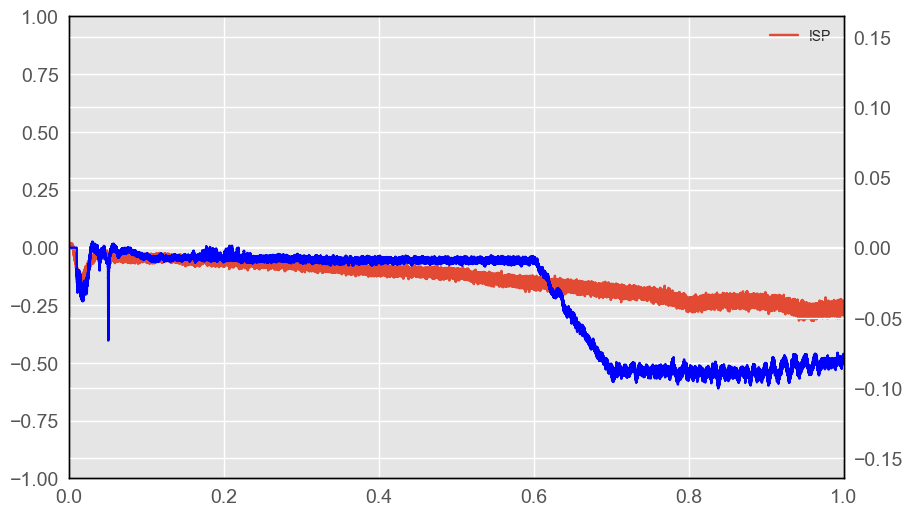

In [8]:
D_sig, d_time = d_alpha_signal(shot_number, 'ISP', output_time=True, normalisation= True)

fig,ax = plt.subplots(1,1 , figsize=(10,6))
ax.plot(d_time, D_sig * -1, label='ISP')
ax2 = ax.twinx()
ax2.plot(mag_time, mag_z, label='Magnetic axis', color = 'blue')

ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.legend(loc = 'upper right')


# Bolometry tests

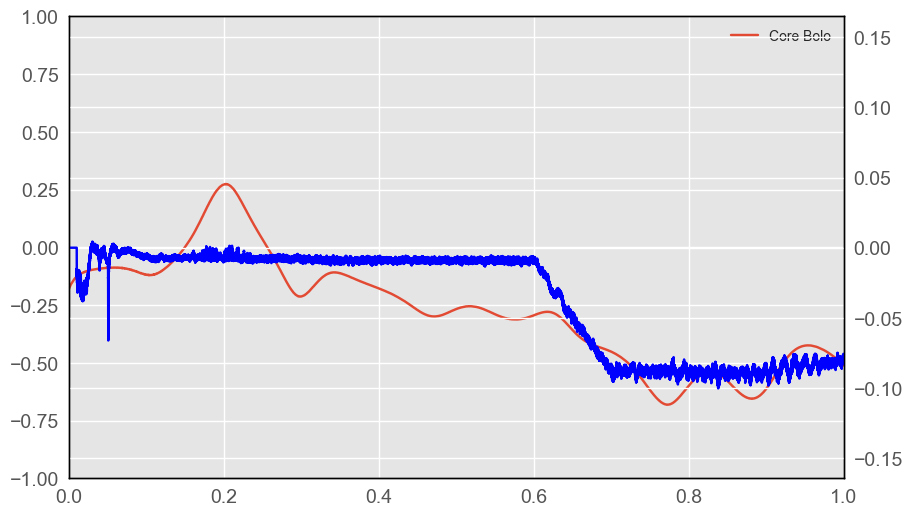

In [9]:
core_bolo, core_bolo_time = core_bolo_xpoint_asymmetry(shot_number, output_time=True)
# sxd_bolo, sxd_bolo_time = bolo_sxd_asymmetry(shot_number, output_time=True)

fig,ax = plt.subplots(1,1 , figsize=(10,6))
ax.plot(core_bolo_time, core_bolo, label='Core Bolo')
# ax.plot(sxd_bolo_time, sxd_bolo, label='SXD Bolo')
ax2 = ax.twinx()
ax2.plot(mag_time, mag_z, label='Magnetic axis', color = 'blue')

ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.legend()

# LP Tests

In [10]:
lp, lp_time = lp_asymmetry(shot_number, sector = 4, parameter='isat', output_time=True, smoothing=True)
fig,ax = plt.subplots(1,1 , figsize=(10,6))
ax.plot(lp_time, lp, label='LP')
ax2 = ax.twinx()
ax2.plot(mag_time, mag_z, label='Magnetic axis', color = 'blue')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(-1,1)

FileNotFoundError: [Errno 2] No such file or directory: '/common/uda-scratch/pryan/elp045416.nc'

# Combined test

(-1.0, 1.0)

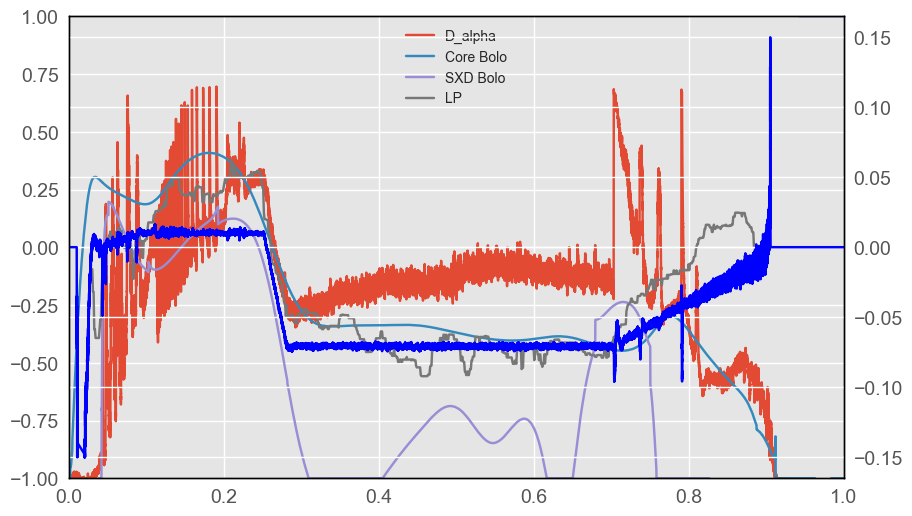